In [1]:
# Connecting csv file 
! git clone 'https://github.com/sathappanPR/Adult_Census_Income_Prediction'

fatal: destination path 'Adult_Census_Income_Prediction' already exists and is not an empty directory.


In [2]:
# Importing librarys
import pandas as pd     
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
adult = pd.read_csv('/content/Adult_Census_Income_Prediction/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
for i in adult.columns:
    print(i, ":")
    print()
    print(adult[i].unique())
    print()
    print(adult[i].nunique())
    print("----------------------------------------")

age :

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

73
----------------------------------------
workclass :

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

9
----------------------------------------
fnlwgt :

[ 77516  83311 215646 ...  34066  84661 257302]

21648
----------------------------------------
education :

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

16
----------------------------------------
education-num :

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

16
----------------------------------------
marital-status :

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Marr

# ENCODING

In [5]:
class encodeing:

  def encodeing_variable(self):

    # Filling question marks in country colum as Nan values
    adult['country'].replace(" ?",np.nan,inplace=True)

    # Droping ("fnlwgt","education") columns which is not required 
    adult.drop(["fnlwgt","education"],inplace = True,axis = 1)

    # Using LabelEncoder(), converting <=50K as 0 and >50k as 1
    from sklearn.preprocessing import LabelEncoder
    labelbncoder=LabelEncoder()
    adult['salary'] = labelbncoder.fit_transform(adult['salary'])

    # Creating dictonary for workclass column and assigning it
    wc_dic = adult["workclass"].value_counts().to_dict()
    adult["workclass"] = adult["workclass"].map(wc_dic)

    # Creating dictonary for marital-status column and assigning it
    adult["marital-status"] = adult["marital-status"].map(adult["marital-status"].value_counts().to_dict())
    
    # assigning mean values to occupation
    meanEncode = adult.groupby(['occupation'])['salary'].mean()*100
    adult['occupation']=adult['occupation'].map(meanEncode)

    # Creating dictonary for relationship column and assigning it
    adult_relationship = ({' Husband' : 5,
                           ' Not-in-family' : 0
                           ,' Own-child' : 2,
                           ' Unmarried' : 3,
                           ' Wife' : 4,
                           ' Other-relative' : 1})
    adult[['relationship','salary']].groupby(['relationship']).mean()
    adult['relationship'] = adult['relationship'].map(adult_relationship)

    # Creating dictonary for race column and assigning it
    adult_race = ({' White' : 4,
                   ' Black' : 3 ,
                   ' Asian-Pac-Islander' : 2,
                   ' Amer-Indian-Eskimo' : 1,
                   ' Other' : 0})
    adult['race']=adult['race'].map(adult_race)

    # Using LabelEncoder(), converting Female as 0 and Male as 1
    adult['sex'] = labelbncoder.fit_transform(adult['sex'])

    # Creating dictonary for country column and assigning it
    c_dic = adult["country"].value_counts().to_dict()
    adult['country'] = adult['country'].map(c_dic)

    # Expanding all columns
    import pandas as pd
    pd.set_option('display.expand_frame_repr', False)

    # Print the first 5 Columns
    print(adult.head(1))

object_encodeing = encodeing()


In [6]:
object_encodeing.encodeing_variable()

   age  workclass  education-num  marital-status  occupation  relationship  race  sex  capital-gain  capital-loss  hours-per-week  country  salary
0   39       1298             13           10683   13.448276             0     4    1          2174             0              40  29170.0       0


In [7]:
adult.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,1298,13,10683,13.448276,0,4,1,2174,0,40,29170.0,0
1,50,2541,13,14976,48.401377,5,4,1,0,0,13,29170.0,0
2,38,22696,9,4443,6.277372,0,4,1,0,0,40,29170.0,0
3,53,22696,7,14976,6.277372,5,3,1,0,0,40,29170.0,0
4,28,22696,13,14976,44.903382,4,3,0,0,0,40,95.0,0


# VISUALIZATION


In [8]:
class visuals:

  def distplot_capital_loss(self):
    print(sns.distplot(adult['capital-loss']))
    print("-------------------------------------------------")

  def distplot_capital_gain(self):
    print(sns.distplot(adult['capital-gain']))
    print("-------------------------------------------------")

  def hist_capital_gain(self):
    print(plt.hist(adult['capital-gain']))
    print("-------------------------------------------------")
    
  def hist_capital_capital_loss(self):
    print( plt.hist(adult['capital-loss']))
    print("-------------------------------------------------")

  def countplot_salary(self):
    print(sns.countplot('salary',data = adult))
    print("-------------------------------------------------")
   
  def barplot_capital_gain(self):
    print(sns.barplot(y = 'capital-gain', x = 'salary',data = adult))
    print("-------------------------------------------------")
  
  def barplot_capital_loss(self):
    print(sns.barplot(y = 'capital-loss', x = 'salary',data = adult))
    print("-------------------------------------------------")

  def sns(self):
    sns.pairplot(adult)

  def corr(self):
    corr = adult.corr()
    top_corr_fearures = corr.index
    plt.figure(figsize = (20,20))
    s=sns.heatmap(adult[top_corr_fearures].corr(),annot=True,cmap = "CMRmap_r")

obj_visuals=visuals()



AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


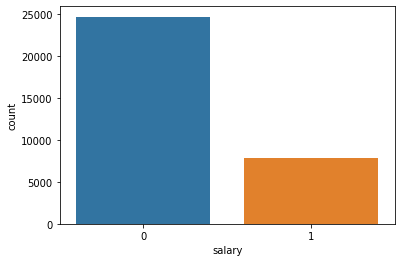

In [9]:
obj_visuals.countplot_salary()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------


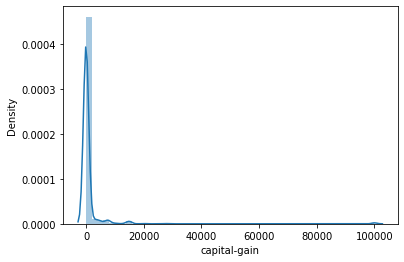

In [10]:
obj_visuals.distplot_capital_gain()

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]), array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
       69999.3, 79999.2, 89999.1, 99999. ]), <a list of 10 Patch objects>)
-------------------------------------------------


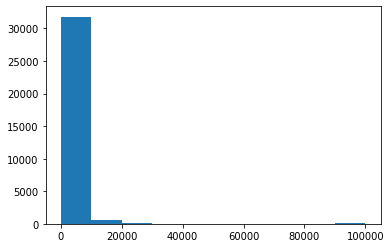

In [11]:
obj_visuals.hist_capital_gain()

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
       2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]), array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
       3484.8, 3920.4, 4356. ]), <a list of 10 Patch objects>)
-------------------------------------------------


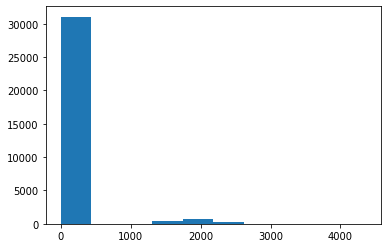

In [12]:
obj_visuals.hist_capital_capital_loss()

AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


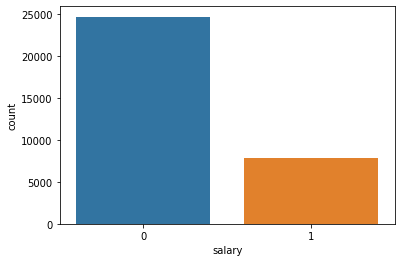

In [13]:
obj_visuals.countplot_salary()

AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------


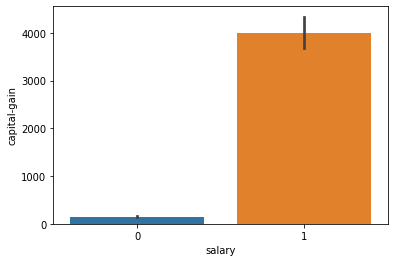

In [14]:
obj_visuals.barplot_capital_gain()

AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------


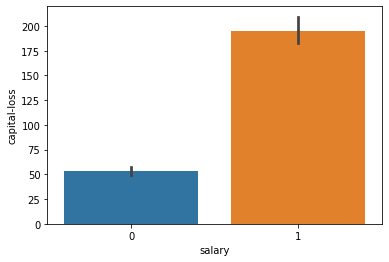

In [15]:
obj_visuals.barplot_capital_loss()

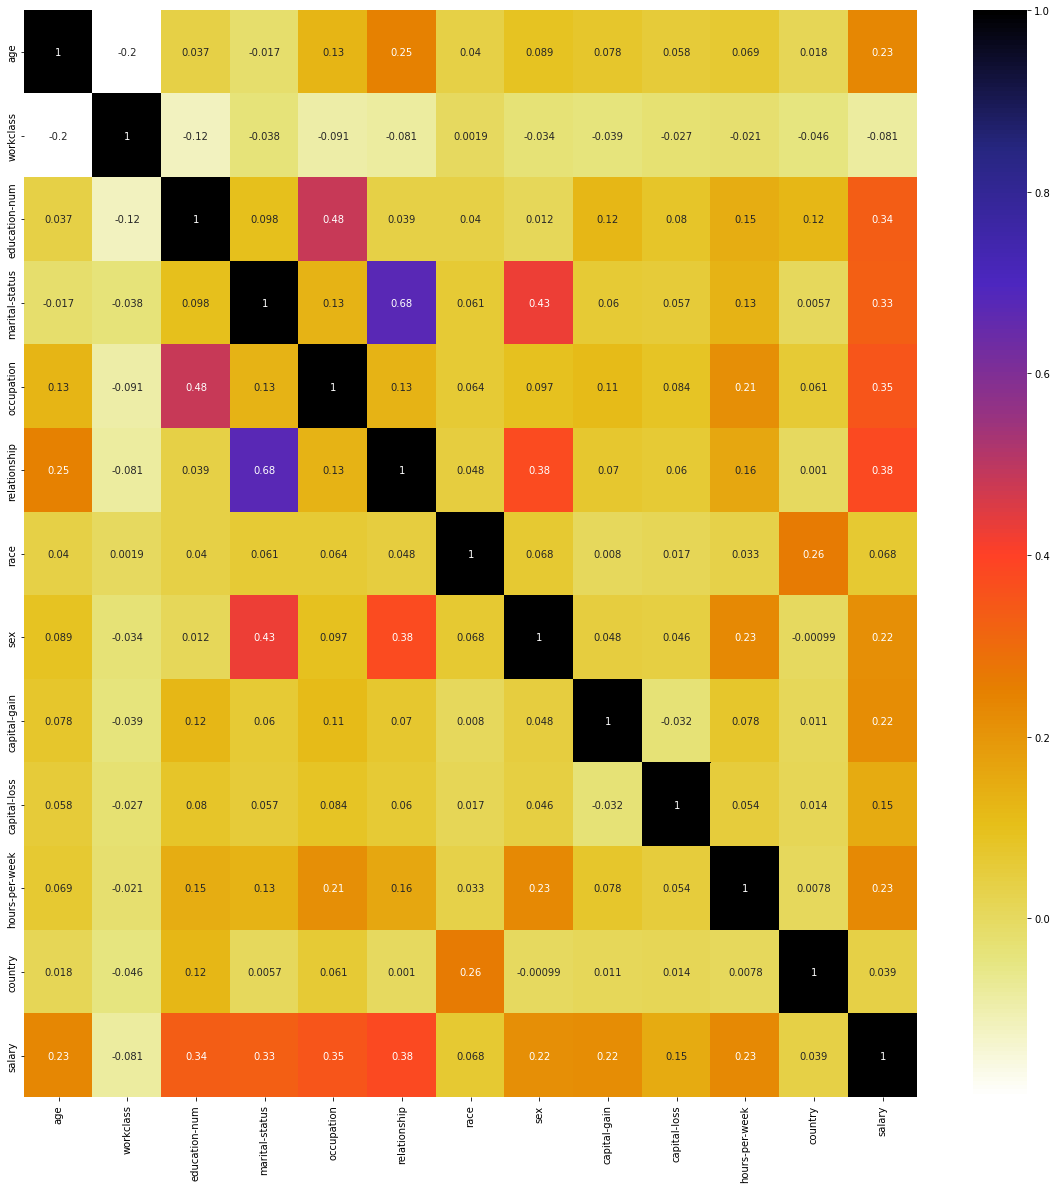

In [16]:
obj_visuals.corr()

# MODEL

In [17]:
class model:      # Creating a class 

  def models(self):  
    adult.replace([np.inf, -np.inf], np.nan, inplace=True) 
    adult.dropna(inplace=True)
    X = adult.drop(['salary'],axis = 1)     
    y = adult['salary']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)     # Splitting the data into 80% for training and 20% for testing

    print("LOGISTIC REGRESSION\n",'\n')                                         # LOGISTIC REGRESSION model
    lr = LogisticRegression(C=.7,solver = 'liblinear')
    lr.fit(X_train,y_train)
    y_lr = lr.predict(X_test) 
    print("The training score is: ", lr.score(X_train,y_train),"\n")            # Printing Training_score
    print("The accuracy is: {}".format(accuracy_score(y_test,y_lr)),"\n")       # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix 
    cm_lr = confusion_matrix(y_test,y_lr)
    print(cm_lr,"\n")

    TP = cm_lr[0][0]
    FP= cm_lr[0][1]
    FN = cm_lr[1][0]
    TN = cm_lr[1][1]
    def math_correlation(tp,fp,fn,tn):     
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math correlation for LOGISTIC REGRESSION is {}".format(result))  # Printing Math_correlation   

    print("-------------------------------------------------------------")

    print("DECISION TREE\n",'\n')                                               # DECISION TREE model
    param_dist = {"max_depth" : [3, None],
                  "max_features" : (1, 9),
                  "min_samples_leaf" : (1, 9),
                  "criterion": ["gini", "entropy"]}                             # Creating the hyperparameter grid 
    tree = DecisionTreeClassifier()
    tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)                      # RandomizedSearchCV hyper parameter
    tree_cv.fit(X_train,y_train)
    print("The training score is: ", tree_cv.score(X_train,y_train),'\n' )      # checking training score
    best_decision_tree = tree_cv.best_estimator_
    best_decision_tree
    y_dt=best_decision_tree.predict(X_test)
    print("Accuracy Score {}".format(accuracy_score(y_test,y_dt)),'\n')         # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix 
    cm_dt = confusion_matrix(y_test,y_dt)
    print(cm_dt,'\n')

    TP = cm_dt[0][0]
    FP = cm_dt[0][1]
    FN = cm_dt[1][0]
    TN = cm_dt[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for DECISION TREE is {}".format(result))         # Printing Math_Correlation 
    pickle.dump(best_decision_tree,open('best_decision_tree.pkl','wb'))         # Pickle file
    
    print("-------------------------------------------------------------")

    print("KNEAREST NEIGHBORS\n",'\n')                                          # KNEAREST NEIGHBORS model
    knn= KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_knn = knn.predict(X_test)
    print("The training score is: ", knn.score(X_train,y_train),'\n' )          # Checking training score
    print("The accuracy is: {}".format(accuracy_score(y_test,y_knn)),'\n')      # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix 
    knn_c = confusion_matrix(y_test,y_knn)
    print(knn_c,'\n')

    TP = knn_c[0][0]
    FP= knn_c[0][1]
    FN = knn_c[1][0]
    TN = knn_c[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for KNEAREST NEIGHBORS is {}".format(result))    # Printing Math_Correlation  

    print("-------------------------------------------------------------")

    print("NAIVE BAYES\n",'\n')                                                 # NAIVE BAYES model     
    nb= GaussianNB()
    nb.fit(X_train,y_train)
    y_nb = nb.predict(X_test)
    print("The training score is: ", nb.score(X_train,y_train) ,'\n')           # Checking training score 
    print("The accuracy is: {}".format(accuracy_score(y_test,y_nb)),'\n')       # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix
    nb_c = confusion_matrix(y_test,y_nb)
    print(nb_c,'\n')

    TP = nb_c[0][0]
    FP= nb_c[0][1]
    FN = nb_c[1][0]
    TN = nb_c[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for NAIVE BAYES is {}".format(result))           # Printing Math_Correlation 

    print("-------------------------------------------------------------")

    
    print("RANDOM FOREST\n",'\n')                                               # RANDOM FOREST model
    rf=RandomForestClassifier(max_depth =50, 
                              min_samples_split = 2,
                              min_samples_leaf = 2, 
                              random_state=42 )
    rf.fit(X_train,y_train)
    y_rf = rf.predict(X_test)  
    print("The training score is: ", rf.score(X_train,y_train),'\n' )           # Checking training score
    print("The accuracy is: {}".format(accuracy_score(y_test,y_rf)),'\n')       # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix
    rf_c = confusion_matrix(y_test,y_rf)
    print(rf_c,'\n')

    TP = rf_c[0][0]
    FP= rf_c[0][1]
    FN = rf_c[1][0]
    TN = rf_c[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for RANDOM FOREST is {}".format(result))         # Printing Math_correlation

    print("-------------------------------------------------------------")

    print("XGBOOST\n",'\n')                                                     # XGBOOST model
    xgb=XGBClassifier(eta=0.2, max_depth=10, max_leaf_nodes=2)
    xgb.fit(X_train,y_train)
    y_xgb = xgb.predict(X_test)  
    print("The training score is: ", xgb.score(X_train,y_train),'\n' )          # Checking Training_score
    print("The accuracy is: {}".format(accuracy_score(y_test,y_xgb)),'\n')      # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix
    x_c = confusion_matrix(y_test,y_xgb)
    print(x_c,'\n')

    TP = x_c[0][0]
    FP = x_c[0][1]
    FN = x_c[1][0]
    TN = x_c[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for RANDOM FOREST is {}".format(result))         # Printing Math_correlation
    
    print("-------------------------------------------------------------")

obj_model=model()                                                               # Creating an object for the class model


In [18]:
obj_model.models()                                                              # Calling the function 

LOGISTIC REGRESSION
 

The training score is:  0.808537252755844 

The accuracy is: 0.8055034396497811 

The confusion matrix: 
[[4555  301]
 [ 943  597]] 

The math correlation for LOGISTIC REGRESSION is 0.4008173125696439
-------------------------------------------------------------
DECISION TREE
 

The training score is:  0.8857399734188101 

Accuracy Score 0.849437148217636 

The confusion matrix: 
[[4504  352]
 [ 611  929]] 

The math corelation for DECISION TREE is 0.5670218204656132
-------------------------------------------------------------
KNEAREST NEIGHBORS
 

The training score is:  0.8910171214134939 

The accuracy is: 0.8464665415884928 

The confusion matrix: 
[[4461  395]
 [ 587  953]] 

The math corelation for KNEAREST NEIGHBORS is 0.5634615126366938
-------------------------------------------------------------
NAIVE BAYES
 

The training score is:  0.8253850363536862 

The accuracy is: 0.8192620387742339 

The confusion matrix: 
[[4562  294]
 [ 862  678]] 

The math 